# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import zipfile
import json
import seaborn as sns
import os
import glob
from PIL import Image
from io import BytesIO

In [5]:
# read twitter_archive_enhanced
df_twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### The tweet json file was downloaded directly 

In [7]:
## Reference: gotten from connect session leader

# read tweet_json file line by line for retweet id, retweet counts and favorite counts
tweets_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        tweets_list.append(
            {'tweet_id' : id,
            'tweet_retweet_count': retweet_count,
            'tweet_favorite_count': favorite_count}
        )
        
# read the tweets list into data frame
tweets_list_df = pd.DataFrame(tweets_list)
tweets_list_df.head()

,tweet_favorite_count,tweet_id,tweet_retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [8]:
# saving the data frame to a csv file
tweets_list_df.to_csv('tweets_list.csv', index = False)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Assessing twitter archive enhanced data virtually

The virtual assessment was done using pandas from the twitter_archive_enhanced dataframe

In [9]:
# assessing the data virtually 
df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


# Assessing twitter archive enhanced data programmatically

## Reference: gotten from udacity lectures

In [10]:
# first five rows 
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# random selection of rows from the dataset
df_twitter_archive_enhanced.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None


In [12]:
# non missing values
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# number of unique value
df_twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
# descriptive statistics
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# sum of duplicated values
df_twitter_archive_enhanced.duplicated().sum()

0

In [16]:
# datatypes
df_twitter_archive_enhanced.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
# Value count for name
df_twitter_archive_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Bailey       7
Daisy        7
an           7
Toby         7
Buddy        7
Oscar        6
Stanley      6
Bella        6
Jack         6
Dave         6
Jax          6
Milo         6
Rusty        6
Leo          6
Scout        6
Koda         6
Finn         5
          ... 
by           1
Stella       1
Poppy        1
Aldrick      1
Lizzie       1
Chubbs       1
Tyrus        1
Meera        1
Colin        1
Izzy         1
Tuck         1
Bayley       1
Karl         1
Bode         1
Monty        1
Birf         1
Butters      1
Wesley       1
Jockson      1
Mollie       1
Glacier      1
Rufio        1
Miley        1
Tessa        1
Sailer       1
Stewie       1
Mimosa       1
Wiggles      1
Luther       1
Chuck        1
Name: name, Length: 957, dtype: int64

In [18]:
# descriptive statistics for rating numerator
df_twitter_archive_enhanced.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [19]:
# descriptive statistics for rating denominator
df_twitter_archive_enhanced.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [20]:
# sum of missing values
df_twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
# datatype for tweet id
type(df_twitter_archive_enhanced['tweet_id'][0])

numpy.int64

In [22]:
# datatype for timestamp
type(df_twitter_archive_enhanced['timestamp'][0])

str

# Assessing tweet image prediction virtually

The virtual assessment was done using pandas from the image_predictions dataframe

In [23]:
# read data into csv 
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t') 

In [24]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# Assessing tweet image prediction programmatically

In [25]:
# first five rows
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
# number of non missing values
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# number of rows and columns
df_image_predictions.shape

(2075, 12)

In [28]:
# number of unique values
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [29]:
# sum of non missing values
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
# Jpg url for row 1
df_image_predictions.loc[1, 'jpg_url']

'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg'

In [31]:
# sum of missing rows in jpg url 
df_image_predictions['jpg_url'].isnull().sum()

0

In [32]:
# display image for row 1
from IPython.display import Image
Image(url = 'https://apbs.twimg.com/media/CT42GRgUYAA5iDo.jpg')

In [33]:
# sum of duplicated rows
df_image_predictions.duplicated().sum()

0

# Assessing tweet list data virtually

The virtual assessment was done using pandas from the tweets_list dataframe

In [34]:
# assessing virtually
tweets_list_df

,tweet_favorite_count,tweet_id,tweet_retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


# Assessing tweet list data programmatically

In [35]:
# first five rows
tweets_list_df.head()

,tweet_favorite_count,tweet_id,tweet_retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [36]:
# nimber of non missing values
tweets_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_favorite_count    2354 non-null int64
tweet_id                2354 non-null int64
tweet_retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [37]:
# descriptive statistics
tweets_list_df.describe()

,tweet_favorite_count,tweet_id,tweet_retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [38]:
# number of unique values
tweets_list_df.nunique()

tweet_favorite_count    2007
tweet_id                2354
tweet_retweet_count     1724
dtype: int64

In [39]:
# number of rows and columns
tweets_list_df.shape

(2354, 3)

In [40]:
# sum of duplicated rows
tweets_list_df.duplicated().sum()

0

### Quality issues


1. incorrect datatypes for all the tweet_id and timestamp

2. Some of the values given to doggo, floofer, pupper, puppo are not valid

3. Some of the dog names are invalid 

4. We only want original ratings (no retweets or reply) that have images

5. The naming of columns p1, p2 and p3 is not consistent, that is, some names start with small letter and others start with capital letter

6. The column for img_num is not needed

7. Most of the names in columns p1, p2 and p3 are seperated with underscores

8. Rows with duplicated urls are not needed

9. Only tweets with images are needed


### Tidiness issues
1. The stages of the dog is divided into four different columns

2. All the given data looks the same but are seperated into different dataframes


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data
# Make copies of original pieces of data
cleaned_df_twitter_archive_enhanced = df_twitter_archive_enhanced.copy()
cleaned_df_image_predictions = df_image_predictions.copy()
cleaned_tweets_list_df = tweets_list_df.copy()

Cleaning quality data issues

### Issue #1: Incorrect datatypes for all the tweet_id and timestamp

### Define: Change the timestamp data type to datetime and tweet_id to object

#### Code

In [42]:
# reference is gotten from google

from datetime import datetime, timedelta
from pandas import DataFrame
# change data type

cleaned_df_twitter_archive_enhanced.timestamp= pd.to_datetime(cleaned_df_twitter_archive_enhanced.timestamp)

In [43]:
# convert the data type for cleaned_df_twitter_archive_enhanced

cleaned_df_twitter_archive_enhanced.tweet_id = cleaned_df_twitter_archive_enhanced.tweet_id.astype(str)

# convert the data type for cleaned_df_image_predictions

cleaned_df_image_predictions.tweet_id = cleaned_df_image_predictions.tweet_id.astype(str)

# convert the data type for cleaned_tweets_list_df

cleaned_tweets_list_df.tweet_id = cleaned_tweets_list_df.tweet_id.astype(str)

#### Test

In [44]:
cleaned_df_twitter_archive_enhanced[['timestamp']].dtypes

timestamp    datetime64[ns]
dtype: object

In [45]:
cleaned_df_twitter_archive_enhanced.timestamp.dtype

dtype('<M8[ns]')

In [46]:
cleaned_df_twitter_archive_enhanced[['tweet_id']].dtypes

tweet_id    object
dtype: object

In [47]:
cleaned_df_image_predictions[['tweet_id']].dtypes

tweet_id    object
dtype: object

In [48]:
cleaned_tweets_list_df[['tweet_id']].dtypes

tweet_id    object
dtype: object

### Issue #2: Some of the values given to doggo, floofer, pupper, puppo are not valid

### Define: Change all the None values in doggo, floffer, pupper, puppo to NAN

#### Code

In [49]:
# replace missing values with nan
cols_to_replace = ['doggo', 'floofer', 'pupper', 'puppo']

for col in cols_to_replace:
    cleaned_df_twitter_archive_enhanced[col] = cleaned_df_twitter_archive_enhanced[col].replace({'None': np.nan})

#### Test

In [50]:
cleaned_df_twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


### Issue #3: Some of the dog names are invalid 

### Define: Remove names with lower case

### code

In [51]:
# find names with uppercase 

cleaned_df_twitter_archive_enhanced.name = cleaned_df_twitter_archive_enhanced.name.str.extract('\\b([A-Z]\\S*)\\b')

In [52]:
# drop rows that contain missing names or None

cleaned_df_twitter_archive_enhanced = cleaned_df_twitter_archive_enhanced[cleaned_df_twitter_archive_enhanced.name != 'None']

### Test

In [53]:
cleaned_df_twitter_archive_enhanced.name.value_counts()

Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
Buddy         7
Daisy         7
Toby          7
Bailey        7
Leo           6
Rusty         6
Jax           6
Jack          6
Scout         6
Stanley       6
Koda          6
Bella         6
Oscar         6
Dave          6
Milo          6
Larry         5
Chester       5
Gus           5
Bentley       5
Finn          5
             ..
Chloe         1
Lupe          1
Alf           1
Deacon        1
Wafer         1
Leonard       1
Stewie        1
Sailer        1
Gert          1
Tessa         1
Crumpet       1
Duchess       1
Pumpkin       1
Jarvis        1
Jebberson     1
Orion         1
Meera         1
Izzy          1
Bayley        1
Karl          1
Bode          1
Monty         1
Birf          1
Wesley        1
Colin         1
Jockson       1
Glacier       1
Rufio         1
Miley         1
Chuck         1
Name: name, Length: 931,

### Issue #4: We only want original ratings (no retweets or reply) that have images

### Define: Remove columns with retweets or reply

### code

In [54]:
# delete retweeted rows and columns

cleaned_df_twitter_archive_enhanced = cleaned_df_twitter_archive_enhanced[cleaned_df_twitter_archive_enhanced.retweeted_status_id.isnull()]


# delete reply rows and columns

cleaned_df_twitter_archive_enhanced = cleaned_df_twitter_archive_enhanced[cleaned_df_twitter_archive_enhanced.in_reply_to_status_id.isnull()]

In [55]:
# delete retweeted rows and columns

cleaned_df_twitter_archive_enhanced = cleaned_df_twitter_archive_enhanced.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

# delete reply rows and columns

cleaned_df_twitter_archive_enhanced = cleaned_df_twitter_archive_enhanced.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'])

### Test

In [56]:
cleaned_df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 2354
Data columns (total 12 columns):
tweet_id              1494 non-null object
timestamp             1494 non-null datetime64[ns]
source                1494 non-null object
text                  1494 non-null object
expanded_urls         1494 non-null object
rating_numerator      1494 non-null int64
rating_denominator    1494 non-null int64
name                  1390 non-null object
doggo                 45 non-null object
floofer               5 non-null object
pupper                137 non-null object
puppo                 16 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 151.7+ KB


Cleaning quality issues for cleaned_df_image_predictions

### Issue #5: The naming of columns p1, p2 and p3 is not consistent, that is, some names start with small letter and others start with capital letter

### Define: capitalize the first letter in colums p1, p2, p3

### code

In [57]:
# change the first letter of each dog name to uppercase

cleaned_df_image_predictions['p1'] = cleaned_df_image_predictions['p1'].str.capitalize()
cleaned_df_image_predictions['p2'] = cleaned_df_image_predictions['p2'].str.capitalize()
cleaned_df_image_predictions['p3'] = cleaned_df_image_predictions['p3'].str.capitalize()

### Test

In [58]:
cleaned_df_image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #6: The column for img_num is not needed

### Define: remove column img_num

### code

In [59]:
# delete img_num rows and columns

cleaned_df_image_predictions = cleaned_df_image_predictions.drop(columns = ['img_num'])

### Test

In [60]:
cleaned_df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


### Issue #7: Most of the names in columns p1, p2 and p3 are seperated with underscores

### Define: Remove the underscores in each names 

### code

In [61]:
# replacing the underscores with space

cleaned_df_image_predictions['p1'] = cleaned_df_image_predictions['p1'].str.replace('_', ' ')
cleaned_df_image_predictions['p2'] = cleaned_df_image_predictions['p2'].str.replace('_', ' ')
cleaned_df_image_predictions['p3'] = cleaned_df_image_predictions['p3'].str.replace('_', ' ')

### Test

In [62]:
cleaned_df_image_predictions.p1.head()

0    Welsh springer spaniel
1                   Redbone
2           German shepherd
3       Rhodesian ridgeback
4        Miniature pinscher
Name: p1, dtype: object

In [63]:
cleaned_df_image_predictions.p2.head()

0                Collie
1    Miniature pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [64]:
cleaned_df_image_predictions.p3.head()

0      Shetland sheepdog
1    Rhodesian ridgeback
2             Bloodhound
3     Miniature pinscher
4               Doberman
Name: p3, dtype: object

### Issue #8: Rows with duplicated urls are not needed

### Define: Remove rows with duplicated urls

### code

In [65]:
# drop rows with duplicated url

cleaned_df_image_predictions = cleaned_df_image_predictions.drop_duplicates(subset='jpg_url', keep=False)

### Test

In [66]:
len(cleaned_df_image_predictions[cleaned_df_image_predictions.jpg_url.duplicated()])

0

In [67]:
cleaned_df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    1943 non-null object
jpg_url     1943 non-null object
p1          1943 non-null object
p1_conf     1943 non-null float64
p1_dog      1943 non-null bool
p2          1943 non-null object
p2_conf     1943 non-null float64
p2_dog      1943 non-null bool
p3          1943 non-null object
p3_conf     1943 non-null float64
p3_dog      1943 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 142.3+ KB


### Issue #9: Only tweets with images are needed

### Define: Remove tweets with no images

### code

In [68]:
# drop rows with no images

cleaned_df_image_predictions.dropna(axis=1, inplace=True)

### Test

In [69]:
cleaned_df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    1943 non-null object
jpg_url     1943 non-null object
p1          1943 non-null object
p1_conf     1943 non-null float64
p1_dog      1943 non-null bool
p2          1943 non-null object
p2_conf     1943 non-null float64
p2_dog      1943 non-null bool
p3          1943 non-null object
p3_conf     1943 non-null float64
p3_dog      1943 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 142.3+ KB


Cleaning tidiness issues

### Issue #1: The stages of the dog is divided into four different columns

### Define: Combine all the four different columns into a single column and name it as dog_stages

### code

In [70]:
# combine all the four different columns

cleaned_df_twitter_archive_enhanced['dog_stages'] = cleaned_df_twitter_archive_enhanced[['doggo','floofer','pupper', 'puppo']].apply(lambda x:','.join(x.dropna().astype(str)), axis=1)


In [71]:
# drop the columns not needed

cleaned_df_twitter_archive_enhanced = cleaned_df_twitter_archive_enhanced.drop(columns = ['doggo','floofer','pupper', 'puppo'])


### Test

In [72]:
cleaned_df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 2354
Data columns (total 9 columns):
tweet_id              1494 non-null object
timestamp             1494 non-null datetime64[ns]
source                1494 non-null object
text                  1494 non-null object
expanded_urls         1494 non-null object
rating_numerator      1494 non-null int64
rating_denominator    1494 non-null int64
name                  1390 non-null object
dog_stages            1494 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 116.7+ KB


### Issue #2: All the given data looks the same but are seperated into different dataframes

### Define: Use tweet_id to merge all the dataframes into one dataframes

### code

In [73]:
# merge cleaned_df_twitter_archive_enhanced with cleaned_tweets_list_df
twitter_archive_master = pd.merge(cleaned_df_twitter_archive_enhanced, cleaned_tweets_list_df, on = 'tweet_id', how='inner')

# merge twitter_archive_master with cleaned_df_image_predictions
twitter_archive_master = pd.merge(twitter_archive_master, cleaned_df_image_predictions, on = 'tweet_id', how='inner')


### Test

In [74]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 21 columns):
tweet_id                1398 non-null object
timestamp               1398 non-null datetime64[ns]
source                  1398 non-null object
text                    1398 non-null object
expanded_urls           1398 non-null object
rating_numerator        1398 non-null int64
rating_denominator      1398 non-null int64
name                    1302 non-null object
dog_stages              1398 non-null object
tweet_favorite_count    1398 non-null int64
tweet_retweet_count     1398 non-null int64
jpg_url                 1398 non-null object
p1                      1398 non-null object
p1_conf                 1398 non-null float64
p1_dog                  1398 non-null bool
p2                      1398 non-null object
p2_conf                 1398 non-null float64
p2_dog                  1398 non-null bool
p3                      1398 non-null object
p3_conf                 1398 non-nul

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Visualization

The relationship between retweet count and tweet favorite count

## Reference: gotten from Udacity lectures and oline searching

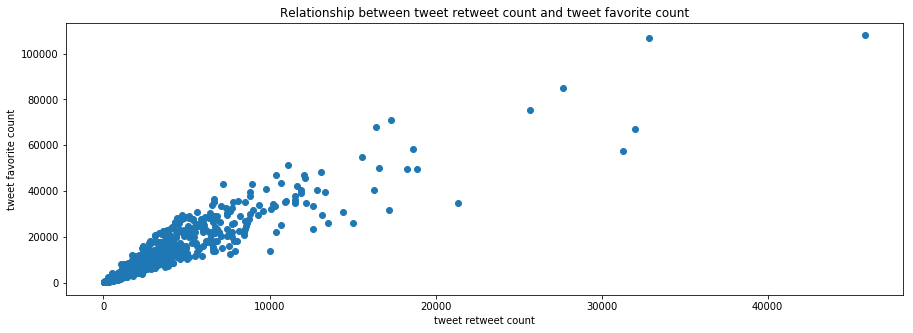

In [76]:
plt.figure(figsize=(15,5))
x = twitter_archive_master.groupby('tweet_retweet_count')['tweet_favorite_count'].mean()
plt.title('Relationship between tweet retweet count and tweet favorite count')
plt.xlabel('tweet retweet count')
plt.ylabel('tweet favorite count')
plt.scatter(x.index, x);

### Insights: The above scatterplot shows a strong positive linear correlation between retweet count and favorite count

The dog name with the highest value

In [77]:
# number of counts for each name
cleaned_df_twitter_archive_enhanced.name.value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Koda          6
Oscar         6
Jax           6
Bo            6
Bailey        6
Stanley       6
Bella         6
Scout         5
Buddy         5
Chester       5
Rusty         5
Leo           5
Bentley       5
Milo          5
Dave          5
Louis         5
Gary          4
Chip          4
Boomer        4
             ..
Daniel        1
Tyrus         1
Bloo          1
Chubbs        1
Rover         1
Bayley        1
Anakin        1
Izzy          1
Baloo         1
Tonks         1
Jo            1
Flurpson      1
Timison       1
Ed            1
Julio         1
Mac           1
Cuddles       1
Chase         1
Gert          1
Meera         1
Cecil         1
Lassie        1
Chompsky      1
Godi          1
Duchess       1
Pumpkin       1
Jarvis        1
Jebberson     1
Orion         1
Chuck         1
Name: name, Length: 929,

In [78]:
# bar chart
def plotting_bar(twitter_archive_master, series, title, y_label, x_label):
    bar_chart = twitter_archive_master[series].value_counts().nlargest(15).plot(kind='bar', color = 'red', figsize=(15,8))
    plt.title(title)  # title 
    plt.xlabel(x_label) # label for x axis
    plt.ylabel(y_label)# label for y axis
    return bar_chart    

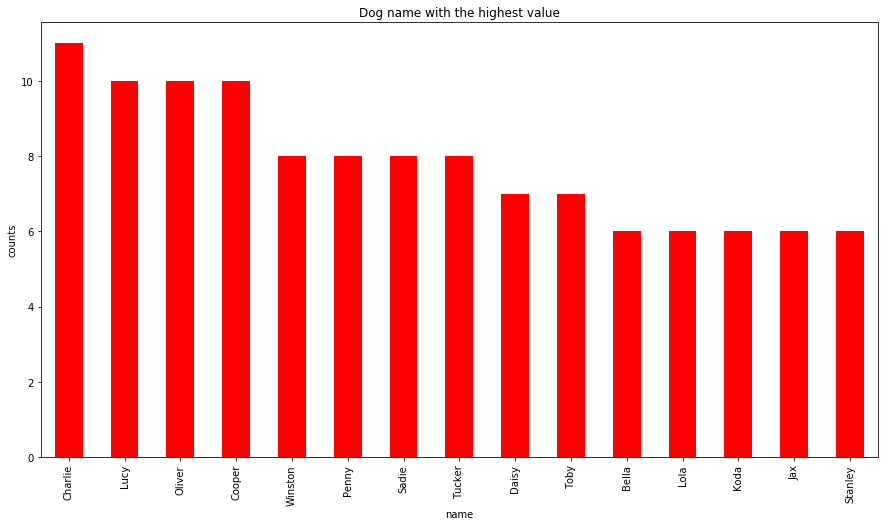

In [79]:
plotting_bar(twitter_archive_master, 'name', 'Dog name with the highest value', 'counts', 'name');

### Insights: Insights:It can be seen from the bar chart above that Charlie has the highest value count

The relationship between dog names and retweet favorite count

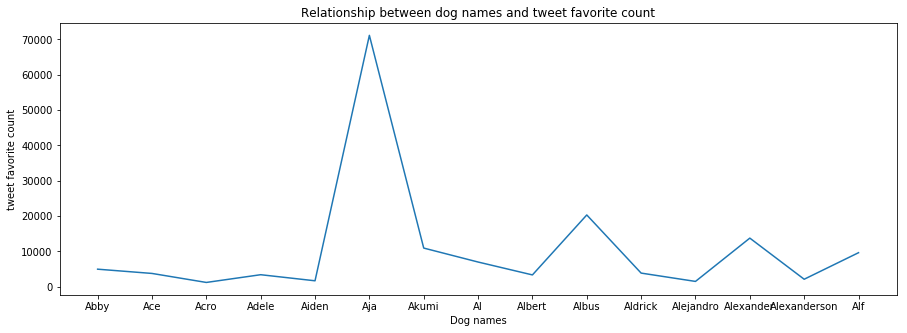

In [80]:
plt.figure(figsize=(15,5))
x = twitter_archive_master.groupby('name')['tweet_favorite_count'].mean().head(15)
plt.title('Relationship between dog names and tweet favorite count')
plt.xlabel('Dog names')
plt.ylabel('tweet favorite count')
plt.plot(x.index, x);

### Insights: From the graph above, it can be seen that there is no relationship between the dog names and their tweet favorite count 

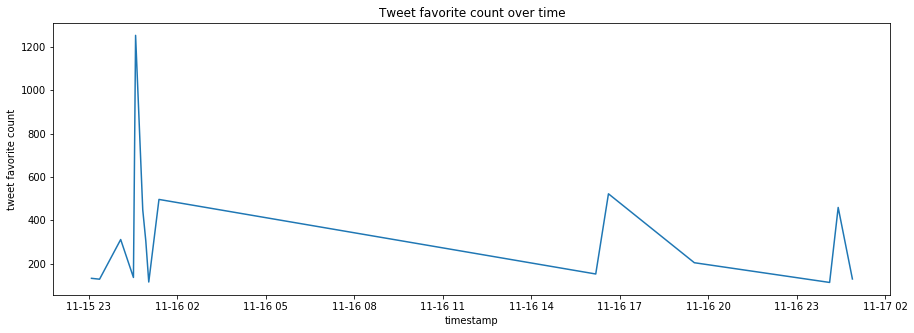

In [81]:
plt.figure(figsize=(15,5))
x = twitter_archive_master.groupby('timestamp')['tweet_favorite_count'].mean().head(15)
plt.title('Tweet favorite count over time')
plt.xlabel('timestamp')
plt.ylabel('tweet favorite count')
plt.plot(x.index, x);

### Insights: The above line graph shows the tweet favourite count over time